# Set paths

In [115]:
path_bnd = '../'
data_dir = '/Users/julian/stroke_research/brain_and_donuts/full_datasets'

In [116]:
import sys
sys.path.insert(1, path_bnd)
import analysis_tools.data_loader as dl
import numpy as np
import matplotlib.pyplot as plt

# Import data 

In [117]:
clinical_inputs, ct_inputs, ct_lesion_GT, mri_inputs, mri_lesion_GT, brain_masks, ids, params = \
dl.load_structured_data(data_dir, 'withAngio_all_2016_2017.npz')

# Reshape ct_inputs as it has 1 channel
ct_inputs = ct_inputs.reshape((*ct_inputs.shape[:-1]))

Loading a total of 113 subjects.
Sequences used: {'ct_sequences': ['wbetted_Angio'], 'ct_label_sequences': ['wcoreg_VOI'], 'mri_sequences': [], 'mri_label_sequences': []}
0 subjects had been excluded.


# Setting up data exploration set

In [118]:
# Train set
n_images = 10
X_f = (ct_inputs[:n_images] * brain_masks[:n_images])
y_f = (ct_lesion_GT[:n_images] * brain_masks[:n_images])

## Set up plotting function

In [119]:
def plot_per_sample_histograms(data, ids = None , log = False , bins = 50, title = None, show=False):
    n_cols = 3
    n_rows = int(data.shape[0] / n_cols) + 1
    fig = plt.figure(figsize=(10, 10))
    for sample_index in range(data.shape[0]):
        plot_index = sample_index + 1
        plt.subplot(n_rows, n_cols, plot_index)
        plt.hist(data[sample_index].reshape((-1, )), bins=bins, log=log)
        sub_title = str(sample_index)
        if ids is not None:
            sub_title += '_' + ids[sample_index]
        plt.title(sub_title)
    if title is not None:
        plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    if show:
        plt.show()
    return fig

Plot histograms of original dataset

Original data histograms


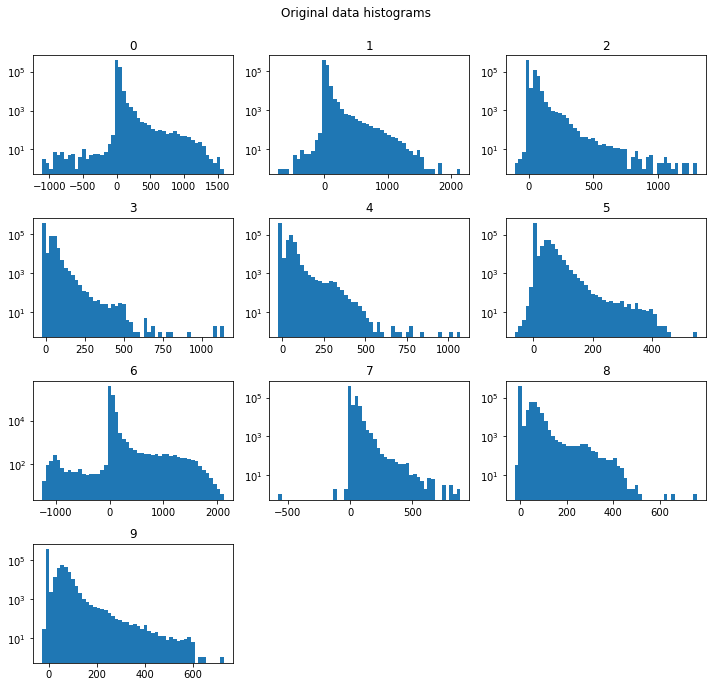

In [120]:
plot_per_sample_histograms(X_f, log=True, title='Original data histograms')
print("Original data histograms")

# Normalisation

## 1. Capping
- data is capped to 0-500
- data outside this range does not seem relevant for vascular analysis
- x < 0 -> mostly air
- x > 500 -> mostly rest of bones, some vascular artefacts, calcifications


In [121]:
X_n = X_f.copy()

vmin = 0
vmax = 500
X_n[X_n < vmin] = vmin
X_n[X_n > vmax] = vmax

for i in range(X_n.shape[0]):
    X_n[i] = X_n[i] / np.max(X_n, axis=(1,2,3))[i]


Plot capped dataset

Capped data histograms


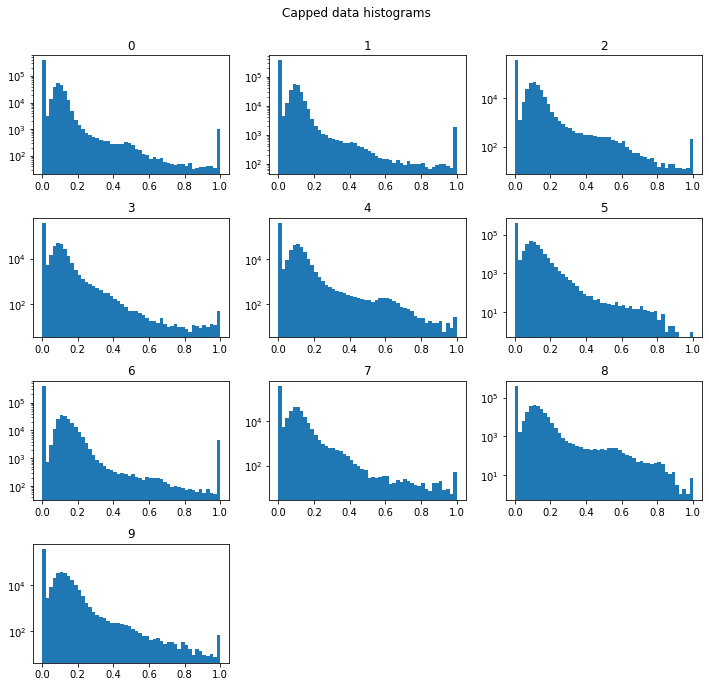

In [122]:
plot_per_sample_histograms(X_n, log=True, title='Capped data histograms')
print("Capped data histograms")

Plot individual samples

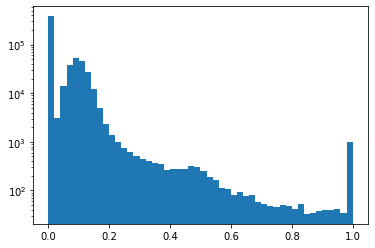

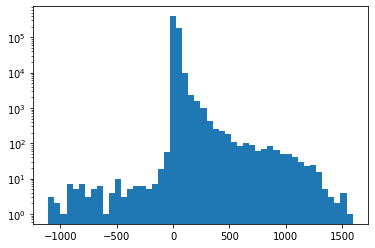

In [123]:
plt.hist(X_n[0].reshape((-1, )), bins=50, log=True)
plt.show()
plt.hist(X_f[0].reshape((-1, )), bins=50, log=True)
plt.show()

Plot images with ranges

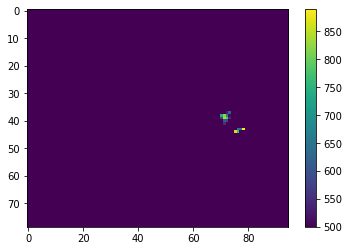

In [124]:
plt.imshow(X_f[0, :, :, 20], vmin=500)
plt.colorbar()
plt.show()

## 2. Standardisation
- Set mean to 0
- set standard deviation to 1
Normally a gaussian distribution is presumed, which is not the case here --> distribution is thus deformed and not centered to 0

In [125]:
X_s = X_n.copy()
for i in range(X_s.shape[0]):
    X_s[i] = (X_s[i] - np.mean(X_s[i])) / np.std(X_s[i])

print('Capped data mean/std', np.mean(X_n), np.std(X_n))
print('Standardised data mean/std', np.mean(X_s), np.std(X_s))



Capped data mean/std 0.04471805709788772 0.07998366963213084
Standardised data mean/std -3.4974960491187754e-17 0.9999999999999996


Plot standardised dataset

Standardised data histograms


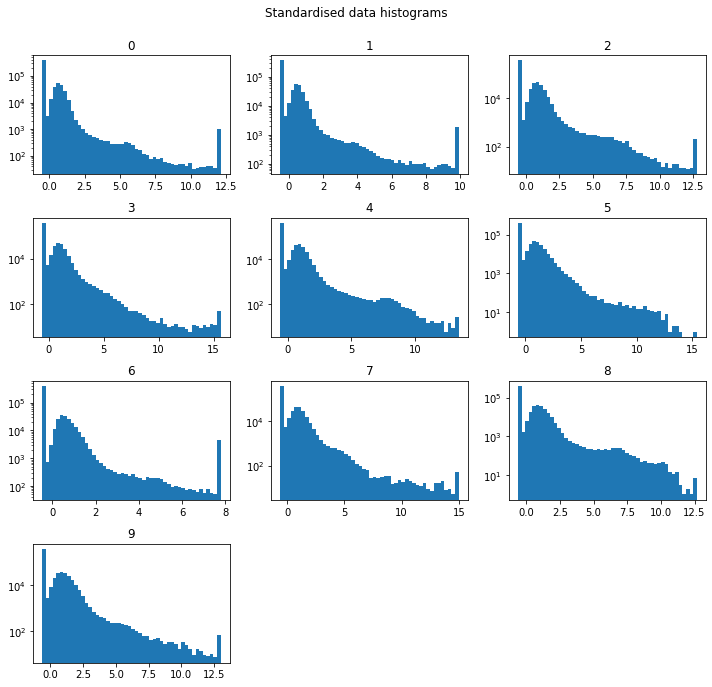

In [127]:
plot_per_sample_histograms(X_s, log=True, title='Standardised data histograms')
print("Standardised data histograms")
